## 4-5. 워드클라우드 만들기 - 해시코드 질문 키워드

- bs4와 wordcloud를 이용해서 질문 키워드를 보여주는 시각화를 진행해봅시다.

### Target: 해시코드 질문 제목의 키워드

지난 실습에서 해시코드(https://hashcode.co.kr) 질문태그를 활용해 Bar Plot을 그렸다면,   
이번 실습에서는 질문 제목을 스크래핑한 후, 형태소 분석을 진행해서 워드클라우드를 그려봅시다.

In [1]:
# 다음 User-Agent를 추가해봅시다.

user_agent = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36"}

In [12]:
# Pagination이 되어있는 질문 리스트의 제목을 모두 가져와 리스트 questions에 저장해봅시다.
# https://hashcode.co.kr/?page={i}
# 과도한 요청을 방지하기 위해 0.5초마다 요청을 보내봅시다.

questions = []

import requests 
from bs4 import BeautifulSoup
import time
for i in range(1,6):
    res = requests.get("https://hashcode.co.kr/?page={}".format(i), {"User-Agent":user_agent})
    soup = BeautifulSoup(res.text, "html.parser")
    parsed_datas = soup.find_all("li", "question-list-item")
    for data in parsed_datas:
        questions.append(data.h4.text.strip())

    time.sleep(0.5)

In [13]:
questions[:10]

['widget_test.dart에서 오류가 납니다',
 '고1 프로그래밍',
 'text에니메이션 효과를 영상처럼 표현하고 싶어요!!!',
 '[플러터] 다른 사람의 작업물 실행하니 빈화면이 뜹니다.',
 '백엔드 개발자로 1년간 취준했던 신입입니다. IT 쪽 개발 전망에 대해 몇가지 궁금한 점이 있습니다.',
 '욜로와 텐서플로우',
 '파이썬 확장파일을 만든후 열려고 하면 순식간에 열린듯 하다가 사라져버립니다.',
 'certbot으로 받은 인증서로 ssl 접속이 안됩니다',
 '파이썬 초보입니다. 5×5로 입력을 받아서 가장 긴 막대기의 길이를 출력하는 코드',
 '링버퍼 내 & 연산자를 모르겠습니다.']

In [14]:
# 텍스트 구름을 그리기 위해 필요한 라이브러리를 불러와봅시다.

# 시각화에 쓰이는 라이브러리
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 횟수를 기반으로 딕셔너리 생성
from collections import Counter

# 문장에서 명사를 추출하는 형태소 분석 라이브러리
from konlpy.tag import Hannanum

In [16]:
# Hannanum 객체를 생성한 후, .nouns()를 통해 명사를 추출합니다.

words=[]
hannanum = Hannanum()
for question in questions:
    nouns = hannanum.nouns(question) #1번 반복할 때 나온 명사들
    words += nouns #누적해서 나오는 명사들
print(len(words))

1082


In [17]:
# counter를 이용해 각 단어의 개수를 세줍니다.
counter = Counter(words)

counter


Counter({'질문': 49,
         '파이썬': 29,
         '오류': 22,
         '문제': 21,
         '언어': 20,
         '코드': 18,
         '수': 18,
         '방법': 14,
         '관련': 14,
         '코딩': 10,
         '출력': 9,
         '코딩테스트': 9,
         '질문드': 8,
         '자바': 7,
         '발생': 7,
         '값': 7,
         '중': 7,
         '실행': 6,
         '궁금': 6,
         '데': 6,
         '사용': 6,
         '에러': 6,
         '프로그래머스': 6,
         '때': 6,
         '프로그램': 6,
         '식': 6,
         '입력': 5,
         '문': 5,
         '부분': 5,
         '설정': 5,
         '구현': 5,
         '웹': 5,
         '해결': 5,
         '것': 5,
         '합': 5,
         '프로그래밍': 4,
         '클래스': 4,
         '파': 4,
         '작성': 4,
         '데이터': 4,
         '시간': 4,
         '저': 4,
         '모듈': 4,
         '기초': 4,
         '테스트': 4,
         '이용': 4,
         '분': 4,
         '공부': 4,
         '파일': 4,
         '개발': 3,
         '초보': 3,
         '내': 3,
         '연산자': 3,
         '연동': 3,
         '크롤링'

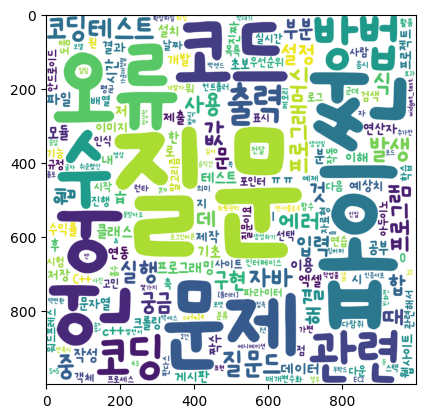

In [22]:
# WordCloud를 이용해 텍스트 구름을 만들어봅시다.
wordcloud = WordCloud(
    font_path = "/Users/truly_flower/Library/Fonts/온글잎 밑미.ttf",
    background_color = "white",
    height = 1000,
    width = 1000
)
img = wordcloud.generate_from_frequencies(counter)
plt.imshow(img)